In [1]:
%matplotlib inline 
import matplotlib.pylab
import numpy as np
import pandas as pd

In [2]:
# Window functions are like aggregation functions
# You can use them in conjunction with .resample() which will soon be a deferred operation

In [3]:
df = pd.DataFrame(np.random.randn(600, 3), index = pd.date_range('7/1/2016', freq = 'S', periods = 600), columns = ['A', 'B', 'C'])

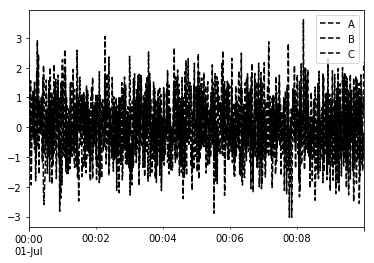

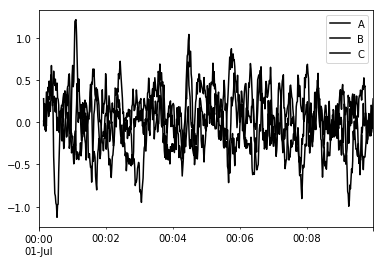

In [7]:
#pd.rolling_mean(df, window = 2)[1:10] # in future versions you want to resample separately
r = df.rolling(window = 10)
#r.agg, r.apply, r.count, r.exclusions, r.max, r.median, r.name, r.quantile, r.kurt, r.cov, r.corr, r.aggregate, r.std, r.skew, r.sum, r.var
df.plot(style = 'k--')
r.mean().plot(style = 'k')

In [39]:
#exponentially weighted
df.ewm(span = 15, min_periods = 2).mean()[1:10]

,A,B,C,D
2016-06-07,-0.806564,-0.011273,0.036305,0.234774
2016-06-08,-0.574366,-0.731052,0.837484,0.512150
2016-06-09,-0.645145,-1.200431,0.995699,0.420742
2016-06-10,-0.659264,-1.206631,1.440489,-0.122517
2016-06-11,-0.690814,-1.178775,1.243433,-0.351820
2016-06-12,-0.541179,-1.231753,0.909384,-0.404834
2016-06-13,-0.519377,-1.241346,0.651678,-0.649400
2016-06-14,-0.545911,-1.116798,0.614929,-1.166160
2016-06-15,-0.543586,-1.218222,0.556355,-1.576301


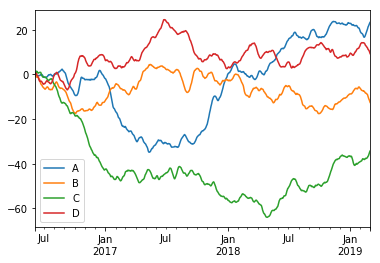

In [38]:
df.ewm(span = 15, min_periods = 2).mean().plot()

In [29]:
# can also easily plot a rolling average per column
df = pd.DataFrame(np.random.randn(1000, 4), index = pd.date_range('6/6/16', periods = 1000), columns = ['A', 'B', 'C', 'D'])

In [30]:
df.head()

,A,B,C,D
2016-06-06,-1.150764,-0.407318,-0.212987,-0.800757
2016-06-07,0.645374,0.742584,0.467423,1.941620
2016-06-08,0.311976,-2.247206,1.897482,-0.173643
2016-06-09,-0.615269,-0.373014,-0.790656,-0.757680
2016-06-10,0.108521,1.060361,1.367664,-1.905733


array([<matplotlib.axes._subplots.AxesSubplot object at 0x11a540390>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x11a664a58>], dtype=object)

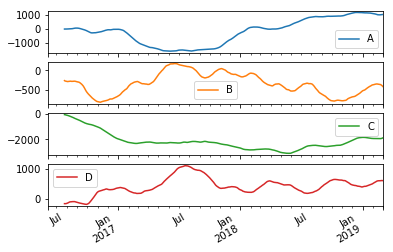

In [31]:
df = df.cumsum()
df.rolling(window = 50).sum().plot(subplots=True)

In [33]:
# What about a custom function?
df.rolling(window = 10).apply(lambda x: np.fabs(x - x.mean()).mean())[10:30]

,A,B,C,D
2016-06-16,0.199172,0.713695,0.858211,1.529943
2016-06-17,0.200903,0.807417,0.879883,1.632732
2016-06-18,0.156035,0.939426,0.761380,1.660987
2016-06-19,0.174024,1.115603,0.741467,1.423953
2016-06-20,0.196193,1.405698,0.569085,1.278609
2016-06-21,0.341541,1.677520,0.582587,1.016684
2016-06-22,0.457104,1.920268,0.439261,0.727796
2016-06-23,0.449073,1.997025,0.727747,0.663845
2016-06-24,0.452567,1.760950,1.158134,0.657355
2016-06-25,0.532283,1.448617,1.589000,0.673122


In [34]:
# Expanding windows
# Yields the value of the statistic with all the data available up to that point in time
df.expanding(min_periods = 1).mean()[1:5]

,A,B,C,D
2016-06-07,-0.828077,-0.036026,0.020724,0.170053
2016-06-08,-0.616523,-0.661330,0.731122,0.435775
2016-06-09,-0.664563,-1.067236,0.888657,0.379217
2016-06-10,-0.671683,-1.098707,1.256711,-0.035865


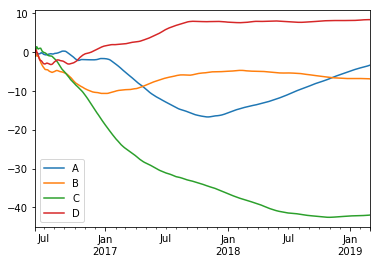

In [35]:
df.expanding(min_periods = 1).mean().plot()

In [40]:
# Will an expanding window provide a more or less stable statistic than a rolling statistic? 
# When might one vs. the other be appropriate?

Expanding window would provide a more stable statistic. Expanding window would be more appropriate when you want to look at the whole data throughout time, which means you still care about old data, while rolling window focuses on looking at each small period.

In [41]:
# EWMA
# Why use EWMA?

Exponential weighted methods put much more weights on most recent data than historic data. EWMA takes the mean of the window so that it tends to not look into things that are not in the center of the window and provides a nice natural dropoff.